# ニューラルネットワーク
- TensorFlowを用いてニューラルネットワークを構築し、Irisデータセットを学習させてみよう

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# one-hotベクトルへの変換
from tensorflow.keras.utils import to_categorical
# モデルの構築と読み込み
from tensorflow.keras.models import Sequential, load_model
# 全結合層
from tensorflow.keras.layers import Dense
# 最適化手法（パラメータの更新方法）
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam

## 2. データの読み込み
- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
  - アヤメの品種分類のデータセット
  - 目的変数（クラス）
      - Setosa
      - Versicolor
      - Virginica
  - 説明変数
      - Sepal Length（萼片の長さ）
      - Sepal Width（萼片の幅）
      - Petal Length（花弁の長さ）
      - Petal Width（花弁の幅）

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


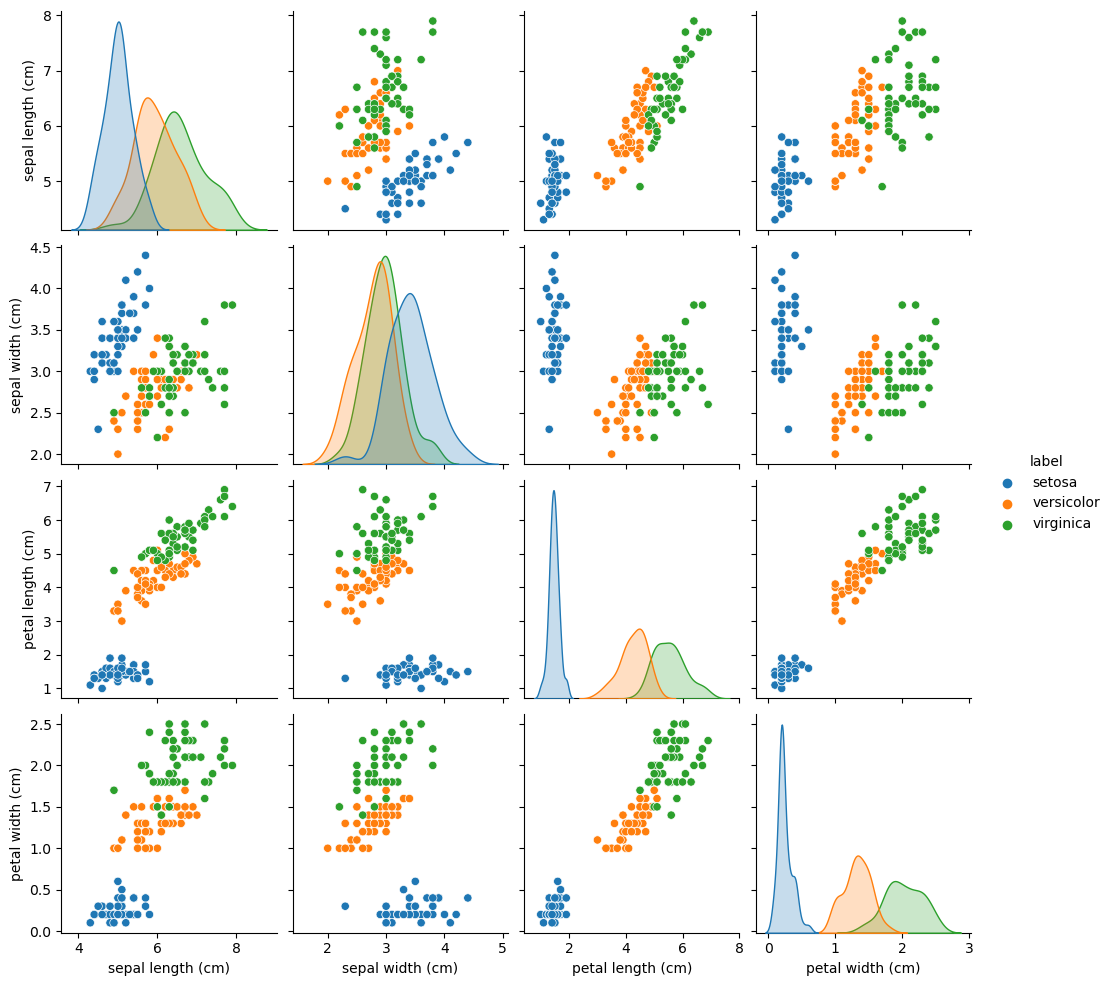

In [2]:
# データセットの読み込み
iris = load_iris()

# 説明変数をデータフレームに変換
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# 目的変数をデータフレームに追加
df_iris["label"] = iris.target

# クラス番号を文字列に置き換え
df_iris["label"] = df_iris["label"].map(
    {0:iris.target_names[0], 
     1:iris.target_names[1], 
     2:iris.target_names[2]}
)
# データフレームの中身を確認
display(df_iris.head())

# 散布図行列の表示（クラスごとに色分け）
sns.pairplot(df_iris, hue="label")
plt.show()

## 3. データの前処理

In [3]:
# 説明変数/目的関数の分割
X = iris.data
y = iris.target

# 訓練用/検証用の分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)

# 目的関数をone-hotベクトルに変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# データサイズの確認
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (105, 4)
X_test: (45, 4)
y_train: (105, 3)
y_test: (45, 3)


## 4. モデルの構築

In [4]:
# 空のモデルを作成
model = Sequential()
# 入力4、出力6の全結合層を追加
# activation: 活性化関数の種類
model.add(Dense(6, activation='relu', input_dim=4))
# 入力6、出力5の全結合層を追加
model.add(Dense(5, activation='relu', input_dim=6))
# 出力3の全結合層を追加
# 分類モデルの場合、最終層のactivationはsoftmax
model.add(Dense(3, activation='softmax'))

# ------ 最適化手法の設定 ------
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(learning_rate=0.01)
# adag = Adagrad(learning_rate=0.01)
# adad = Adadelta(learning_rate=0.01)
# adam = Adam(learning_rate=0.01)
# -----------------------------

# モデルの学習プロセスを設定
# 損失関数、最適化手法、評価指標を指定
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

# モデルの構造を確認
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 5. モデルの学習

In [5]:
# 学習の実行
# epochs: 学習回数
# batch_size: 一度に計算するデータの数（バッチサイズ）
fit = model.fit(
    X_train, y_train,
    epochs=50, batch_size=20,
    validation_data=(X_test, y_test)
)

# 各epochにおける損失と正解率をdfに格納
df = pd.DataFrame(fit.history)

Epoch 1/50
6/6 [==============================] - 1s 60ms/step - loss: 1.4009 - accuracy: 0.2190 - val_loss: 1.1752 - val_accuracy: 0.0667
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 1.0041 - accuracy: 0.3429 - val_loss: 0.8063 - val_accuracy: 0.6222
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6913 - accuracy: 0.6857 - val_loss: 0.6393 - val_accuracy: 0.6222
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5885 - accuracy: 0.6857 - val_loss: 0.5805 - val_accuracy: 0.6222
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5245 - accuracy: 0.6857 - val_loss: 0.4810 - val_accuracy: 0.6889
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.4778 - accuracy: 0.8476 - val_loss: 0.4587 - val_accuracy: 0.6889
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.4489 - accuracy: 0.6952 - val_loss: 0.4189 - val_accuracy: 0.8444
Epoch 8/50
6/6 [===========

## 6. 学習結果の確認

### 6-1. 学習曲線の表示

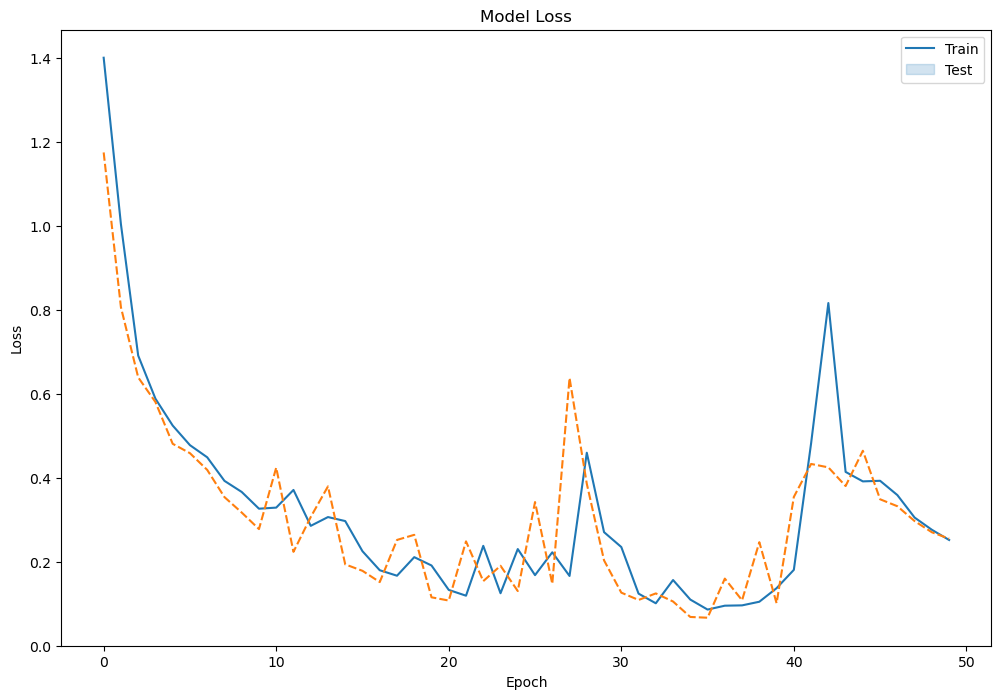

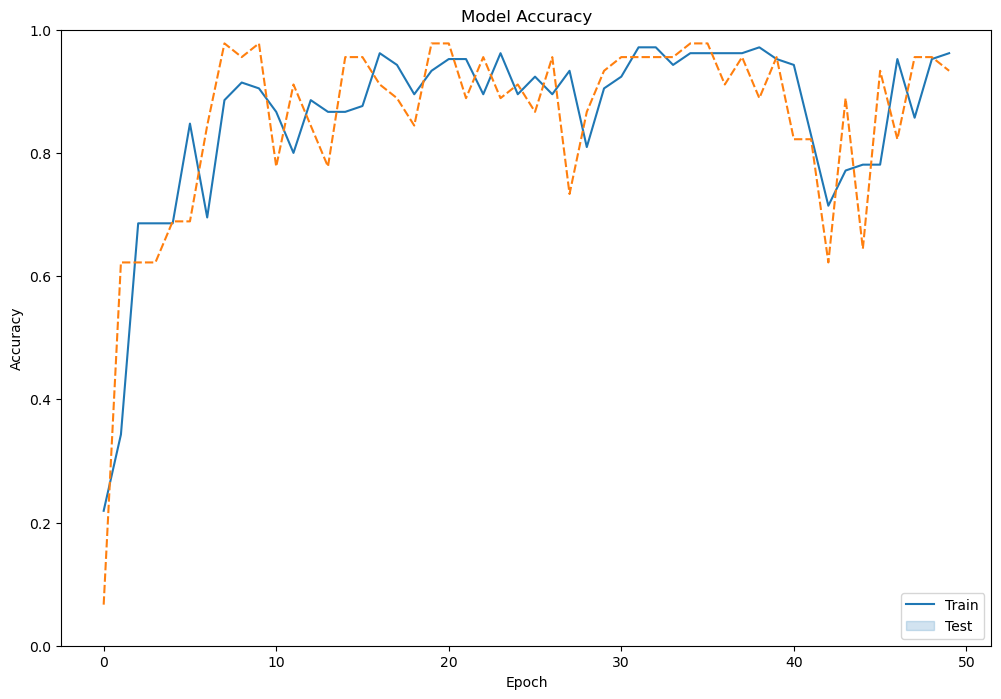

In [6]:
# Loss (損失)をグラフ化
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[["loss", "val_loss"]])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Accuracy (正解率)をグラフ化
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[["accuracy", "val_accuracy"]])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0,1.0])
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### [演習]
- 以下のパラメータを変更して、結果がどう変わるか確認しよう
    * epochs
    * batch_size
    * activation
    * 層の数
    * 各層の出力ノード数
    * 学習率
    * 最適化手法

### 6-2. 学習後のパラメータを表示

In [7]:
# パラメータを取得
weights = model.get_weights()

# 全ての層のパラメータを表示
# 偶数番目は重み、奇数番目はバイアス
for i in range(len(weights)):
    print("weights[%s]="%i)
    print(weights[i])
    print("num:",weights[i].flatten().shape[0])
    print()

weights[0]=
[[-0.33299777  0.1173033   0.038746   -0.10054118 -0.16344285  1.0907683 ]
 [-0.17494386 -0.67514586 -0.6634359  -0.8541814  -0.10640674  0.24260029]
 [-0.57980067  0.9732491   0.24253978  1.6027133   0.65872127 -0.82134306]
 [-0.33228657  1.159295    0.888793    0.6010479   0.33845553 -1.1343031 ]]
num: 24

weights[1]=
[ 0.         -0.24175799 -0.16731378 -0.23823105 -0.20907304  0.33441857]
num: 6

weights[2]=
[[ 0.71263784 -0.51306874  0.46090442 -0.29739583  0.5323469 ]
 [-0.0885699  -0.7208868   0.1828951  -1.1672195  -0.22386928]
 [ 0.784331   -0.5992001   0.6346341  -0.40654185 -0.4639653 ]
 [ 0.42206967 -0.40078202  0.27658716 -1.3076733   0.34169447]
 [ 0.1741393  -0.04018056  0.26079604 -0.52118754 -0.4181909 ]
 [-0.7700956  -0.48460126 -0.0493258   1.1842515  -0.14052142]]
num: 30

weights[3]=
[-0.02496619  0.         -0.23395438  0.38751462 -0.05100761]
num: 5

weights[4]=
[[-0.20008425 -0.93574274  0.05117688]
 [-0.6182211   0.07643843  0.12773818]
 [-1.0879904

### [問]
* 重みは全部でいくつあるだろうか？

### 6-3. 予測の実行

In [8]:
# 各カテゴリに属する確率を算出
y_proba = model.predict(X_test)

# クラスラベルに変換
# 確率が最も大きい要素の番号を抽出
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)

2/2 [==============================] - 0s 3ms/step
[1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 2 2 0 0
 0 0 1 0 2 0 2 2]


### [参考] 
- model.save()を用いるとモデルの保存が可能
- load_model()を用いるとモデルの読み込みが可能
    - ただし、パスに2バイト文字（日本語など）が含まれる場合は読み込めない

In [ ]:
# モデルの保存
model.save("my_model.h5")

# モデルの読み込み
# model = load_model("./my_model.h5")